## 실습에 필요한 데이터 파일 다운로드

In [1]:
# 실습 파일에 필요한 데이터 파일 다운로더 설치
!pip install opendata-kr -q


[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from opendata import dataset

dataset.download('민간아파트분양')

======= 다운로드 시작 =======

data/house_price.csv


  0%|          | 0.00/131k [00:00<?, ?B/s]


======= 다운로드 완료 =======


## 기본 import

In [3]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
plt.rcParams['font.family'] = "NanumGothic"

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (12, 8)

## 데이터셋 로드

- 주택도시보증공사_전국 신규 민간 아파트 분양가격 동향
- 출처: 공공데이터 포털(https://www.data.go.kr/)

In [4]:
df = pd.read_csv('data/house_price.csv')
df.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


## DataFrame을 활용한 시각화

kind 옵션:
* line: 선그래프
* bar: 바 그래프
* barh: 수평 바 그래프
* hist: 히스토그램
* kde: 커널 밀도 그래프
* box: 박스 플롯
* pie: 파이 그래프
* scatter: 산점도 그래프

### line 그래프

* line 그래프는 데이터가 연속적인 경우 사용하기 적절합니다. (예를 들면, 주가 데이터)

<AxesSubplot: >

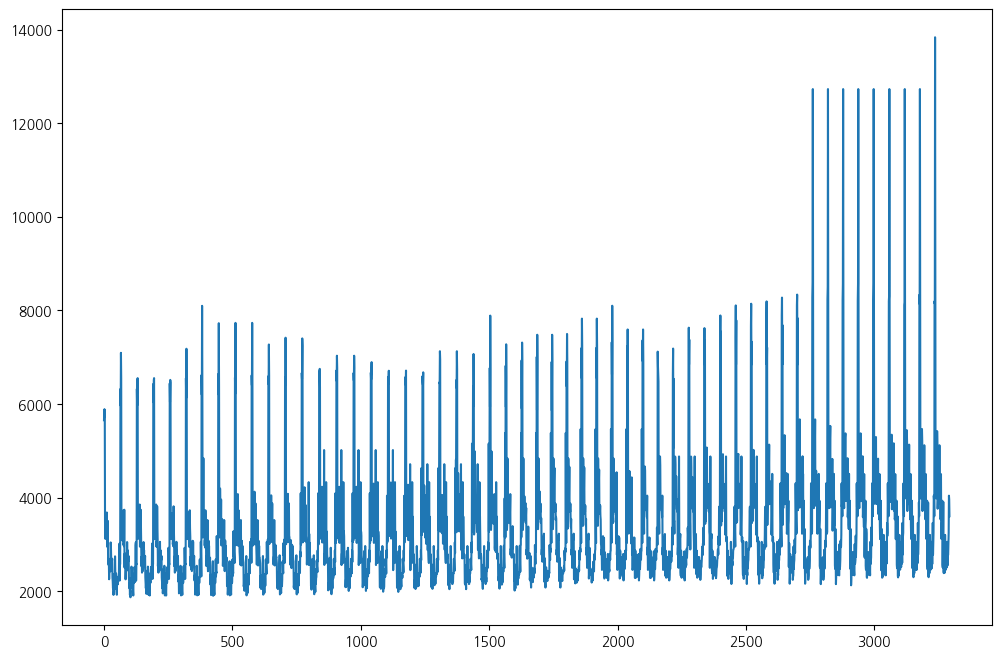

In [5]:
df['분양가'].plot(kind='line')

서울 지역으로 필터링

In [6]:
df_seoul = df.loc[df['지역'] == '서울']
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


연도별 분양가의 평균 값을 출력

In [7]:
df_seoul_year = df_seoul.groupby('연도')[['분양가']].mean()
df_seoul_year

,분양가
연도,
2015,6201.000000
2016,6674.520833
2017,6658.729167
2018,7054.687500
2019,8735.083333
2020,9647.375000


<AxesSubplot: xlabel='연도'>

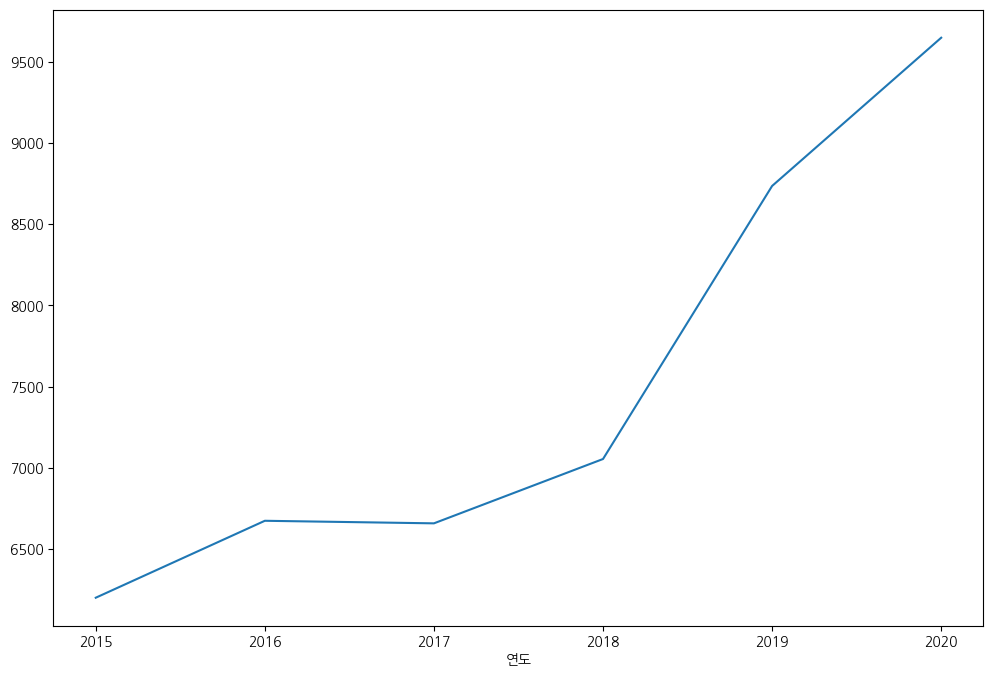

In [8]:
df_seoul_year['분양가'].plot(kind='line')

## bar 그래프

bar 그래프는 그룹별로 비교할 때 유용합니다.

In [9]:
df.groupby('지역')['분양가'].mean()

지역
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가, dtype: float64

<AxesSubplot: xlabel='지역'>

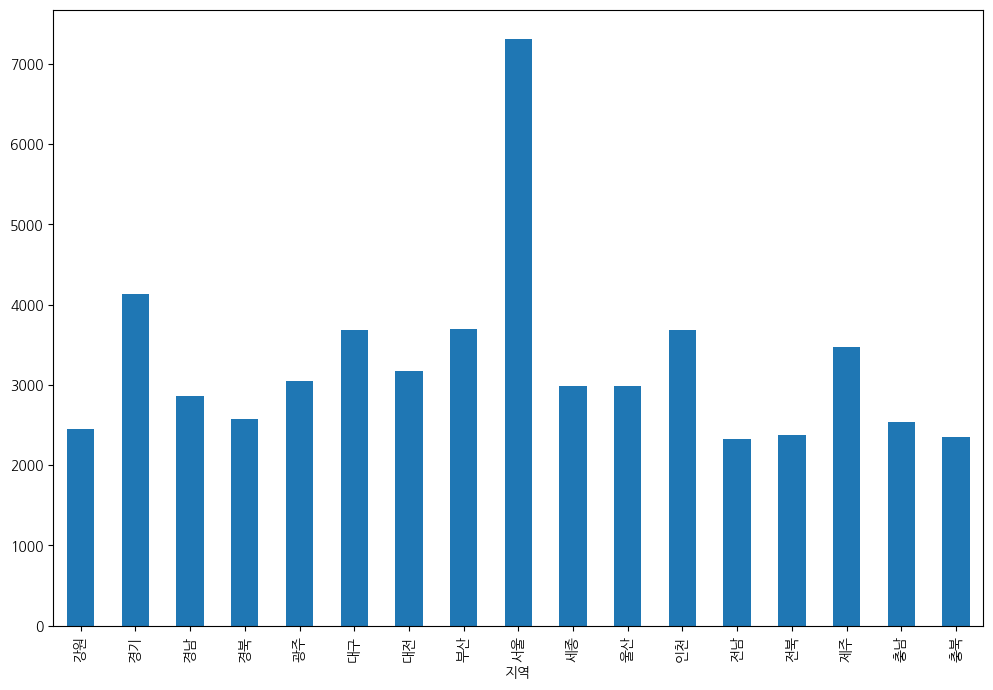

In [10]:
df.groupby('지역')['분양가'].mean().plot(kind='bar')

<AxesSubplot: ylabel='지역'>

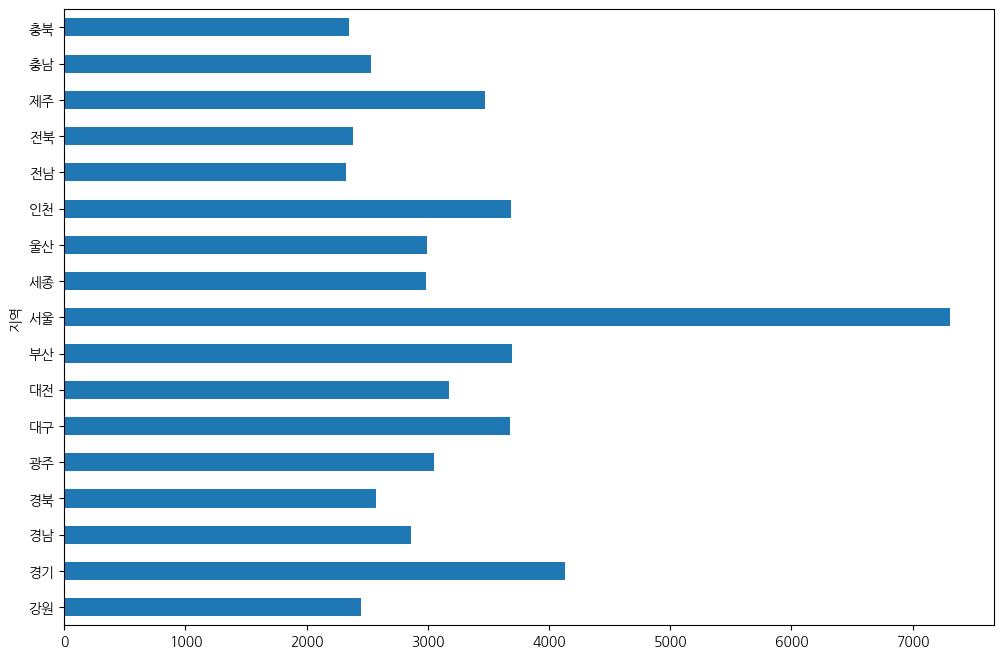

In [11]:
df.groupby('지역')['분양가'].mean().plot(kind='barh')

### 히스토그램 (hist)

히스토그램은 **분포-빈도 를 시각화**하여 보여줍니다

가로축에는 분포를, 세로축에는 빈도가 시각화되어 보여집니다.

<AxesSubplot: ylabel='Frequency'>

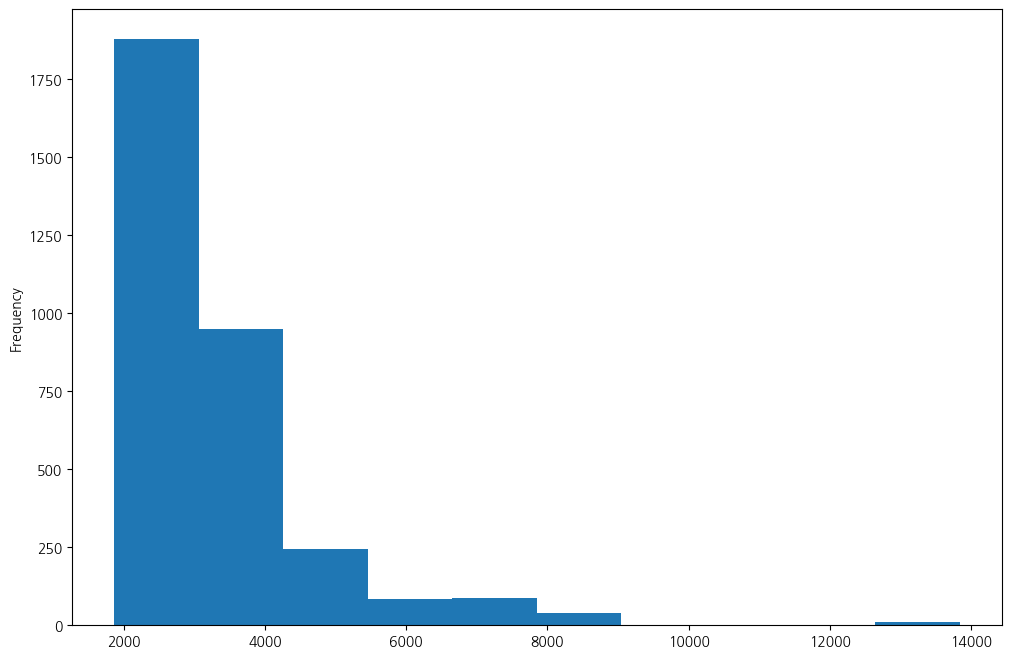

In [12]:
df['분양가'].plot(kind='hist')

### 커널 밀도 그래프

* 히스토그램과 유사하게 밀도를 보여주는 그래프입니다.
* 히스토그램과 유사한 모양새를 갖추고 있습니다. 
* 부드러운 라인을 가지고 있습니다.

<AxesSubplot: ylabel='Density'>

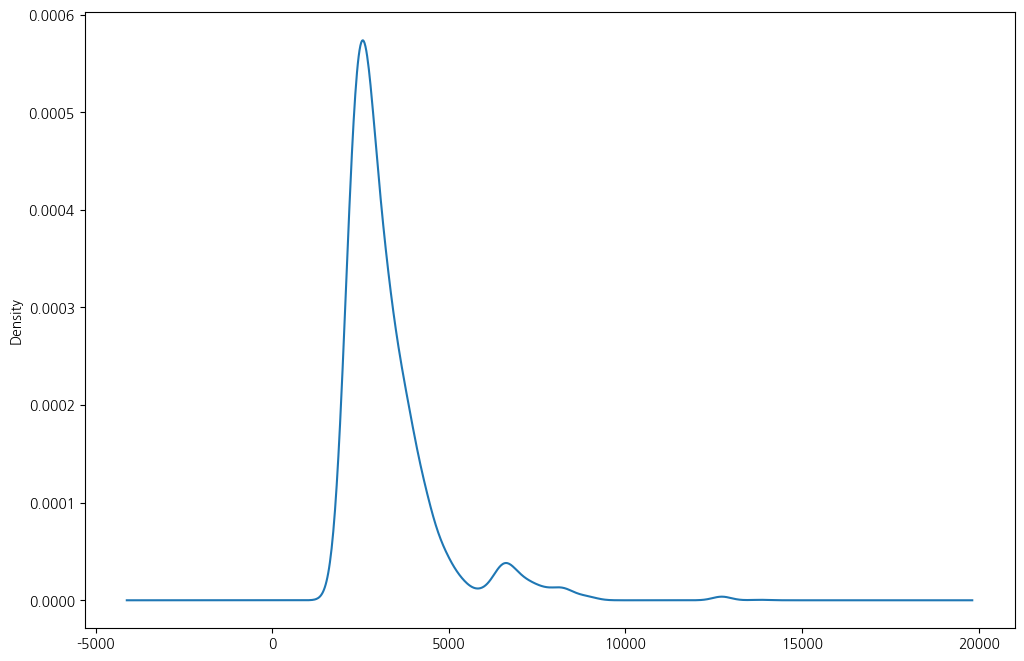

In [13]:
df['분양가'].plot(kind='kde')

### 박스 플롯(box)

In [14]:
df_seoul = df.loc[df['지역'] == '서울']

<AxesSubplot: >

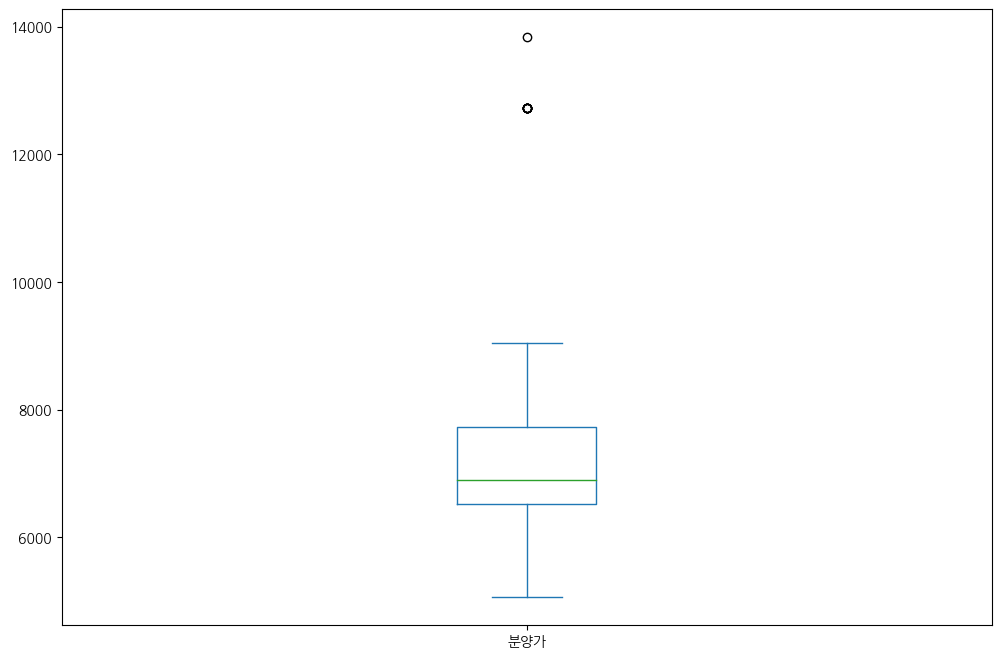

In [15]:
df_seoul['분양가'].plot(kind='box')

In [16]:
from IPython.display import Image

# image source : https://justinsighting.com/how-to-interpret-box-plots/
Image(url='https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png')

IQR은 Inter Quantile Range의 약어로써, (3Q - 1Q) * 1.5 값입니다.

### Pie 그래프

<AxesSubplot: ylabel='분양가'>

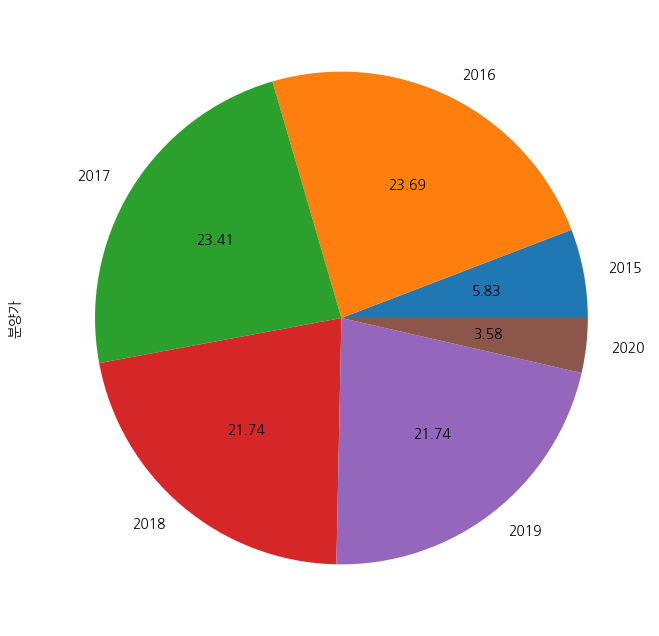

In [17]:
df.groupby('연도')['분양가'].count().plot(kind='pie', autopct="%.2f", figsize=(8, 8))

### 산점도 그래프(Scatter Plot)

* 점으로 데이터를 표기해 줍니다
* x, y 값을 넣어주어야합니다 (hexbin과 유사)
* x축과 y축을 지정해주면 그에 맞는 데이터 분포도를 볼 수 있습니다.
* 역시 numeric 한 column 만 지정할 수 있습니다

In [18]:
df.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


<AxesSubplot: xlabel='월', ylabel='분양가'>

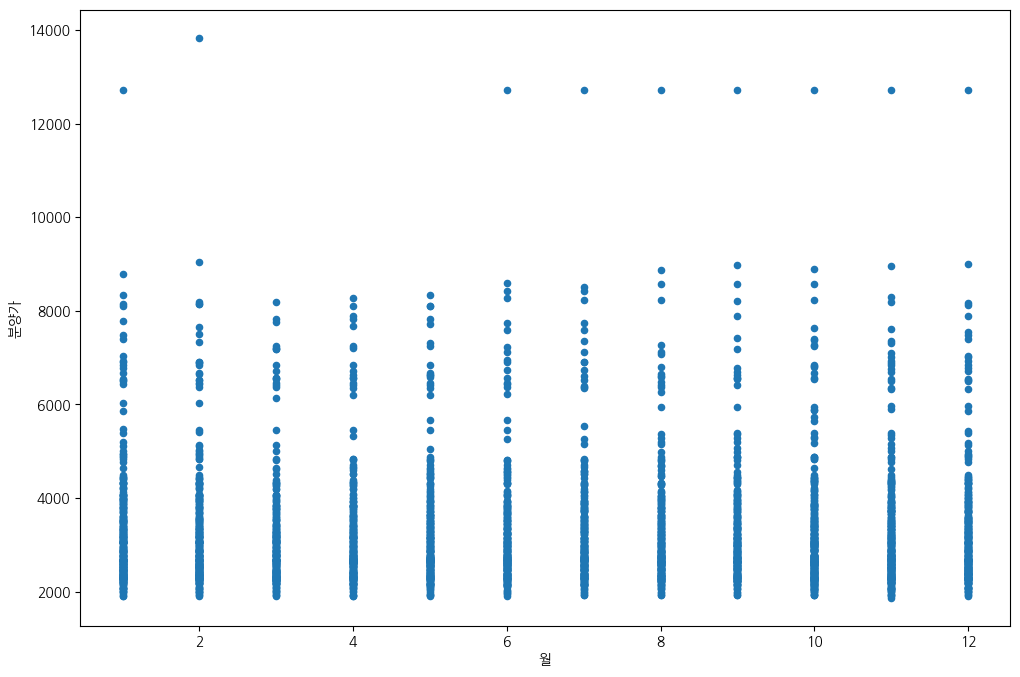

In [19]:
df.plot(x='월', y='분양가', kind='scatter')

## 제출

제출을 위해 새로 불러온 `house_price.csv` 데이터에서 `지역`으로 그룹핑한 후 `분양가` 컬럼의 평균값을 bar 그래프로 그리세요.

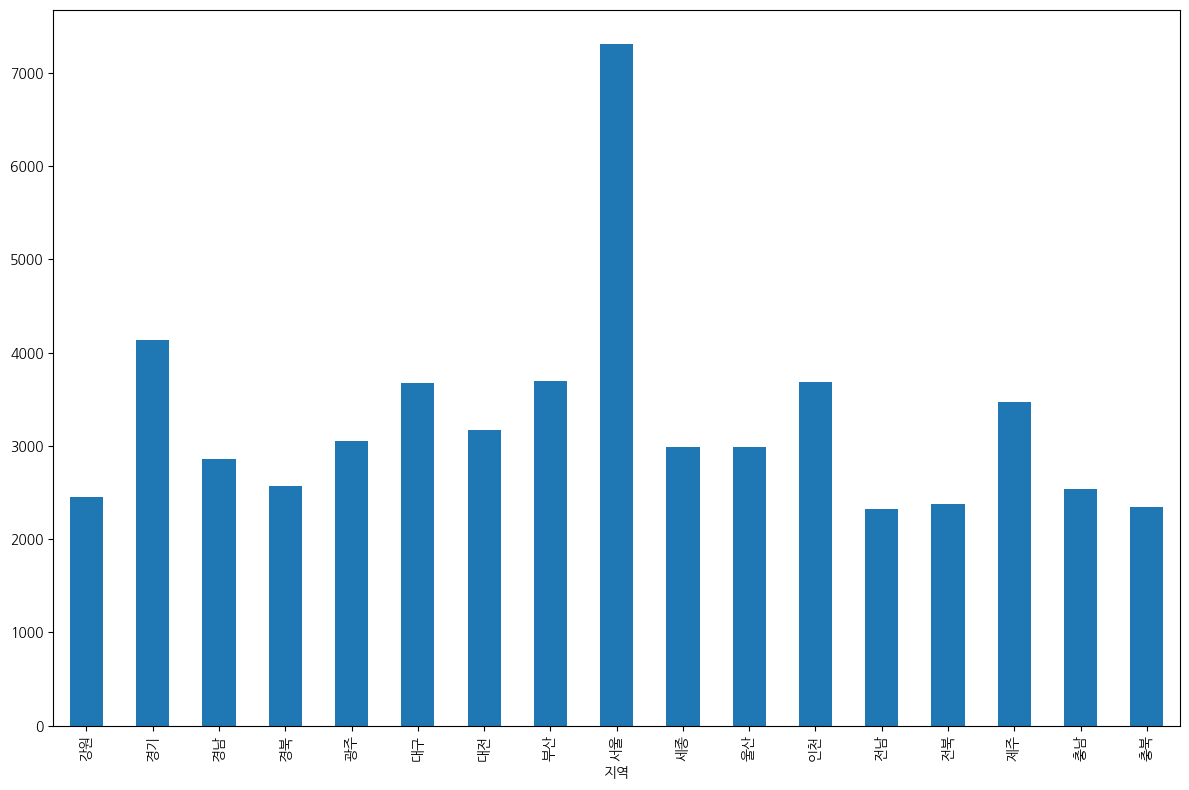

In [26]:
df = pd.read_csv('data/house_price.csv')

# TODO: 조건에 맞는 그래프를 그리세요.
df.groupby('지역')['분양가'].mean().plot(kind='bar')

# 이 아래를 수정하면 제대로 채점되지 않습니다.
plt.tight_layout()
plt.savefig('result.png')

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [27]:
import os

os.system('elice_grade result.png cds_ds_exercise.ipynb')

send files ['result.png', 'cds_ds_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.604 seconds
=== Message ===
제출 완료되었습니다.


0